In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import plotly.express as px

In [ ]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv")
df.head(16)

Your task will be to create a multiple linear regression model using some of these features to predict CO2 emissions of unobserved cars based on the selected features.


In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df = df.drop(['MODEL','MODELYEAR','MAKE','VEHICLECLASS','FUELTYPE'], axis=1)

DROP IR RELEVANT COLUMNS 


In [ ]:
df.head()

In [ ]:
corr=df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,cmap = "Blues", annot=True)
plt.show()

examine the correlations of the distinct pairs. 'ENGINESIZE' and 'CYLINDERS' are highly correlated, but 'ENGINESIZE' is more correlated with the target, so we can drop 'CYLINDERS'.

Similarly, each of the four fuel economy variables is highly correlated with each other. Since FUELCONSUMPTION_COMB_MPG is the most correlated with the target, you can drop the others: 'FUELCONSUMPTION_CITY,' 'FUELCONSUMPTION_HWY,' 'FUELCONSUMPTION_COMB.'

In [ ]:
df =df.drop(["CYLINDERS","FUELCONSUMPTION_COMB","FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY"], axis=1)

In [ ]:
df.head(10)

In [ ]:
plot = df[['ENGINESIZE','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]
sns.pairplot(plot,kind = 'scatter' , plot_kws={'alpha':0.5})


NOW TRAIN  MODEL BY SEPRATING TARGET AND INPUT COLUMNS

iloc in pandas
Meaning: integer location

Lets you select rows and columns by their numeric position (0-based index) instead of by labels.

df.iloc[0:5, :]      # rows 0–4, all columns

df.iloc[:, [0,2]]    # all rows, only columns 0 and 2

df.iloc[[1,3,5], 0]  # rows 1,3,5 of column 0

In [ ]:
x = df.iloc[:,[0,1]].to_numpy()  #SELECT ONLY COLUMN ENGINESIZE AND FUELCONSUMPTION_COMB_MPG FOR INPUT
y = df.iloc[:,2].to_numpy()       #SELECT ONLY COLUMN CO2EMISSIONS FOR OUTPUT

Preprocess selected features

You should standardize your input features so the model doesn't inadvertently favor any feature due to its magnitude. The typical way to do this is to subtract the mean and divide by the standard deviation. Scikit-learn can do this for you.

In [ ]:
from sklearn import preprocessing

std_scaler = preprocessing.StandardScaler()
x_std = std_scaler.fit_transform(x)

df.round(2)       # rounds every numeric column in a DataFrame to 2 decimals


In [ ]:
pd.DataFrame(x_std).describe().round(2)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train,x_test,y_train,y_test = train_test_split(x_std,y,test_size=0.2,random_state=42)
model = LinearRegression()

In [ ]:
model.fit(x_train,y_train)

Model Testing

Now our model is ready to use for prediction. Let's test our regressor model on test data.

We use predict() method to predict the results for the test set. It takes input features (X_test) and return the redicted values.






In [ ]:
y_pred = model.predict(x_test)
df2 = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df2

Model Evaluation
We now evaluate our model to check how accurate it is. We will use mean square error (MSE), root mean square error (RMSE), mean absolute error (MAE), and R2-score (Coefficient of determination).



In [ ]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

MSE/RMSE:

Batate hain ki prediction aur actual value ke beech average error kitna bada hai, aur badi galtiyon ko zyada weight dete hain.

R² Score (Coefficient of Determination)

Measures how well your regression model’s predictions match the actual data. 

1.0 (or 100%) → Perfect fit. Model explains all variability.

0.0 → Model explains nothing beyond the mean.

MAE:

Batata hai average error kitna hai, chahe galti chhoti ho ya badi.

Outliers (bahut badi ya bahut chhoti galti) se jyada affect nahi hota.

In [120]:
coef = model.coef_
intercept = model.intercept_


In [ ]:
df.head()

y = w1x1 + w2x2 + b

y =CO2 EMISSION     

X1 = ENGSIZE

X2 = FUELCOMBUSTION    

In [107]:
def formula(eng,fuel,w1,w2,b):
    return w1*eng + w2*fuel + b



In [ ]:
# engine = df['ENGINESIZE']
# petrol = df['FUELCONSUMPTION_COMB_MPG']
# actual = df['CO2EMISSIONS']
# column = df.iloc[:,2]

In [ ]:
# import numpy as np
# import plotly.graph_objects as go

# def tryparam(w1, w2, b):
#     # Scatter plot of actual data
#     fig = go.Figure()
#     fig.add_trace(go.Scatter3d(
#         x=engine,
#         y=petrol,
#         z=actual,
#         mode='markers',
#         marker=dict(size=3, color=engine, colorscale='Viridis'),
#         name='Actual Data'
#     ))
#     # Create grid for hyperplane
#     eng_range = np.linspace(engine.min(), engine.max(), 30)
#     fuel_range = np.linspace(petrol.min(), petrol.max(), 30)
#     eng_grid, fuel_grid = np.meshgrid(eng_range, fuel_range)
#     z_grid = w1 * eng_grid + w2 * fuel_grid + b
#     # Add regression plane
#     fig.add_trace(go.Surface(
#         x=eng_grid,
#         y=fuel_grid,
#         z=z_grid,
#         colorscale='Reds',
#         opacity=0.5,
#         name='Regression Plane'
#     ))
#     fig.update_layout(
#         title='Regression Hyperplane',
#         scene=dict(
#             xaxis_title='ENGINESIZE',
#             yaxis_title='FUELCONSUMPTION_COMB_MPG',
#             zaxis_title='CO2EMISSIONS'
#         )
#     )
#     fig.show()


In [116]:
tryparam(w1,w2,intercept)

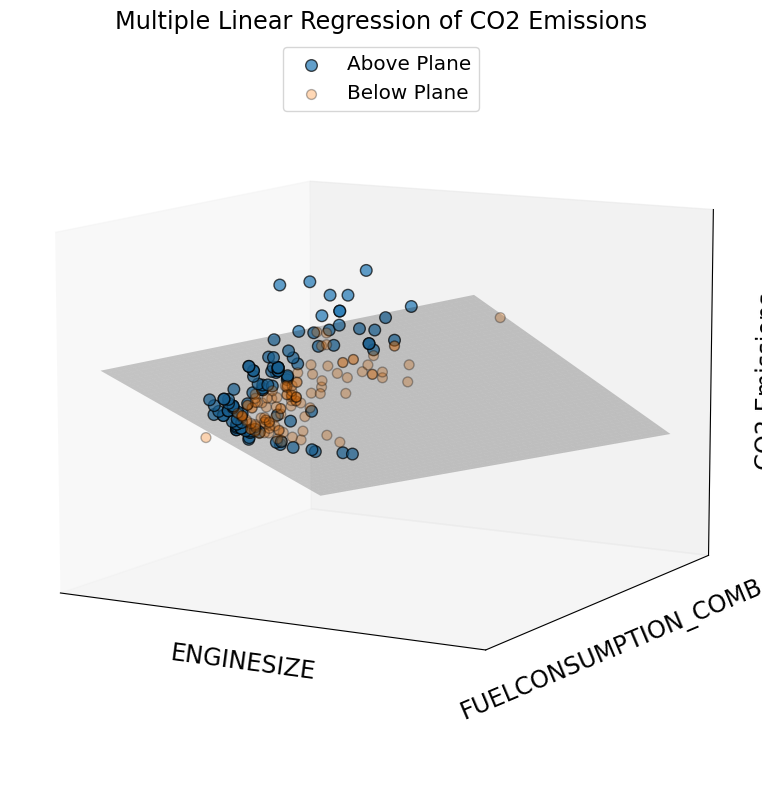

In [122]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure X1, X2, and y_test have compatible shapes for 3D plotting
X1 = x_test[:, 0] if x_test.ndim > 1 else x_test
X2 = x_test[:, 1] if x_test.ndim > 1 else np.zeros_like(X1)

# Create a mesh grid for plotting the regression plane
x1_surf, x2_surf = np.meshgrid(np.linspace(X1.min(), X1.max(), 100), 
                               np.linspace(X2.min(), X2.max(), 100))

# Use correct coef indexing for 1D array
if coef.ndim == 1:
    y_surf = intercept + coef[0] * x1_surf + coef[1] * x2_surf
else:
    y_surf = intercept + coef[0,0] * x1_surf + coef[0,1] * x2_surf

# Predict y values using trained regression model to compare with actual y_test for above/below plane colors
if x_test.ndim == 1:
    y_pred = model.predict(x_test.reshape(-1, 1))
else:
    y_pred = model.predict(x_test)

# Flatten arrays for boolean indexing
above_plane = y_test >= y_pred
below_plane = y_test < y_pred
above_plane = above_plane.flatten()
below_plane = below_plane.flatten()

# Plotting
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points above and below the plane in different colors
ax.scatter(X1[above_plane], X2[above_plane], y_test[above_plane],  label="Above Plane",s=70,alpha=.7,ec='k')
ax.scatter(X1[below_plane], X2[below_plane], y_test[below_plane],  label="Below Plane",s=50,alpha=.3,ec='k')

# Plot the regression plane
ax.plot_surface(x1_surf, x2_surf, y_surf, color='k', alpha=0.21)

# Set view and labels
ax.view_init(elev=10)

ax.legend(fontsize='x-large',loc='upper center')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_box_aspect([1,1,0.75])
ax.set_xlabel('ENGINESIZE', fontsize='xx-large')
ax.set_ylabel('FUELCONSUMPTION_COMB_MPG', fontsize='xx-large')
ax.set_zlabel('CO2 Emissions', fontsize='xx-large')
ax.set_title('Multiple Linear Regression of CO2 Emissions', fontsize='xx-large')
plt.tight_layout()
plt.show()


In [123]:
import numpy as np
import plotly.graph_objects as go

# --- Prepare the test data ---
X1 = x_test[:, 0] if x_test.ndim > 1 else x_test
X2 = x_test[:, 1] if x_test.ndim > 1 else np.zeros_like(X1)

# Mesh grid for the regression plane
x1_surf, x2_surf = np.meshgrid(
    np.linspace(X1.min(), X1.max(), 100),
    np.linspace(X2.min(), X2.max(), 100)
)

# Compute Z values of the plane using your coefficients
if coef.ndim == 1:
    y_surf = intercept + coef[0] * x1_surf + coef[1] * x2_surf
else:
    y_surf = intercept + coef[0, 0] * x1_surf + coef[0, 1] * x2_surf

# Predictions for test set
if x_test.ndim == 1:
    y_pred = model.predict(x_test.reshape(-1, 1))
else:
    y_pred = model.predict(x_test)

above_plane = (y_test >= y_pred).flatten()
below_plane = ~above_plane

# --- Plotly figure ---
fig = go.Figure()

# Points above the plane
fig.add_trace(go.Scatter3d(
    x=X1[above_plane],
    y=X2[above_plane],
    z=y_test[above_plane],
    mode='markers',
    name='Above Plane',
    marker=dict(size=6, color='blue', opacity=0.7, line=dict(width=1, color='black'))
))

# Points below the plane
fig.add_trace(go.Scatter3d(
    x=X1[below_plane],
    y=X2[below_plane],
    z=y_test[below_plane],
    mode='markers',
    name='Below Plane',
    marker=dict(size=6, color='red', opacity=0.4, line=dict(width=1, color='black'))
))

# Regression plane
fig.add_trace(go.Surface(
    x=x1_surf,
    y=x2_surf,
    z=y_surf,
    colorscale=[[0, 'gray'], [1, 'gray']],
    opacity=0.25,
    showscale=False,
    name='Regression Plane'
))

# Layout and styling
fig.update_layout(
    scene=dict(
        xaxis_title='ENGINESIZE',
        yaxis_title='FUELCONSUMPTION_COMB_MPG',
        zaxis_title='CO2 Emissions',
        aspectratio=dict(x=1, y=1, z=0.75)
    ),
    legend=dict(x=0.5, y=1.05, orientation='h'),
    title='Multiple Linear Regression of CO2 Emissions',
)

fig.show()
